# Teste A/B Propaganda

Dataset contendo um teste A/B feio por uma agência de propaganda.

Fonte: https://www.kaggle.com/datasets/osuolaleemmanuel/ad-ab-testing

#### Dicionário

**auction_id:** identificação do usuário que teve contato com o teste. Os usuários que optarem por não responder terão a colunas 'yes' e 'no' com valor 0.

**experiment:** grupo do usuário, controle ou experimental
  * control: usuários que viram um anúncio fictício.
  * exposed: usuários que viram o anúncio a ser experimentado. Um anúncio interativo, com a marca SmartAd.

**date:** data em que o usuário teve contato com o experimento (no formato YYYY-MM-DD).

**hour:** hora do dia (no formato HH)

**device_make:** nome do tipo de aparelho do usuário.

**platform_os:** id do sistema operacional do usuário.

**browser:** nome do navegador que o usuário utilizou para ver o questionário.

**yes:** 1 se o usuário pressionou o botão YES do questionário.

**no:** 1 se o usuário pressionou o botão NO do questionário.

### Imports

In [1]:
!pip install matplotlib==3.4.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Abertura do dataset

In [2]:
# Tutorial: https://www.analyticsvidhya.com/blog/2021/04/how-to-download-kaggle-datasets-using-jupyter-notebook/

!pip install opendatasets
import opendatasets as od
od.download("https://www.kaggle.com/datasets/osuolaleemmanuel/ad-ab-testing")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Skipping, found downloaded files in "./ad-ab-testing" (use force=True to force download)


In [112]:
data = pd.read_csv('/content/ad-ab-testing/AdSmartABdata - AdSmartABdata.csv')
data.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


# Tratamentos

In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


* Não há dados nulos.
* A data pode ser convertida para datetime.

In [114]:
data.iloc[: ,0].nunique() == data.shape[0]

True

* Não há entrada duplicadas no dataset.

In [115]:
data['date'] = pd.to_datetime(data['date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   auction_id   8077 non-null   object        
 1   experiment   8077 non-null   object        
 2   date         8077 non-null   datetime64[ns]
 3   hour         8077 non-null   int64         
 4   device_make  8077 non-null   object        
 5   platform_os  8077 non-null   int64         
 6   browser      8077 non-null   object        
 7   yes          8077 non-null   int64         
 8   no           8077 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 568.0+ KB


# Grupo de controle e experimental

In [116]:
experiment_count = data.groupby('experiment').count().reset_index()[['experiment', 'auction_id']]
experiment_count.rename(columns = {'auction_id':'n_users'}, inplace = True)
experiment_count

,experiment,n_users
0,control,4071
1,exposed,4006


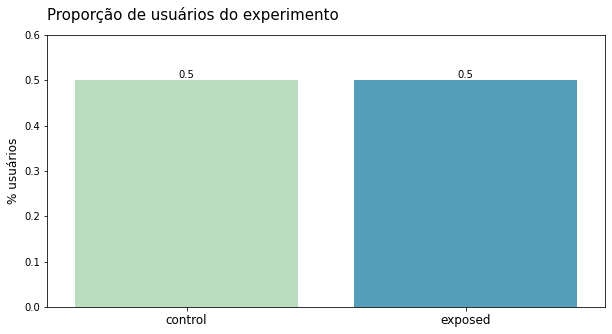

In [117]:
plt.figure(figsize = (10,5))

ax = sns.barplot(data = experiment_count, x = 'experiment', y = 'n_users', estimator = lambda x: len(x)/len(experiment_count),
                 palette = 'GnBu')

ax.bar_label(ax.containers[0])
ax.set_ylabel('% usuários', fontsize = 12)
ax.set_xlabel('')
plt.xticks(fontsize = 12)
ax.set_title('Proporção de usuários do experimento', fontsize = 15, pad = 15, horizontalalignment = 'left', x = 0)

ax.set_ylim((0, 0.6))

plt.show()

# Quantidade de usuários em cada grupo e botões pressionados

In [118]:
data['button'] = ['None' for x in data['auction_id']]
data.loc[data['yes'] == 1, 'button'] = 'Yes'
data.loc[data['no'] == 1, 'button'] = 'No'

In [144]:
experiment_button = data.groupby(['experiment', 'button']).count()
experiment_button = experiment_button.reset_index()[['experiment', 'button', 'auction_id']]
experiment_button.rename(columns = {'auction_id': 'n_users'}, inplace = True)
experiment_button

,experiment,button,n_users
0,control,No,322
1,control,None,3485
2,control,Yes,264
3,exposed,No,349
4,exposed,None,3349
5,exposed,Yes,308


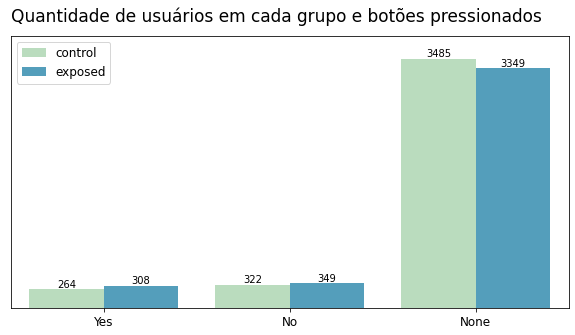

In [183]:
plt.figure(figsize = (10,5))

ax = sns.barplot(data = experiment_button, x = 'button', y = 'n_users', hue = 'experiment', palette = 'GnBu', order = ['Yes', 'No', 'None'])

ax.set_title('Quantidade de usuários em cada grupo e botões pressionados', fontsize = 17, pad = 15, horizontalalignment = 'left', x = 0)

ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

ax.set_ylabel('')
ax.set_xlabel('')

plt.xticks(fontsize = 12)
plt.yticks([])

plt.legend(title='', fontsize = 12)

ax.set_ylim((0, 3800))

plt.show()

* Em números totais, o grupo experimental interagiu mais do que os usuários do grupo de controle.

* Entretanto, a diferença é pequena e pode não ser estatisticamente relevante.

# Botões pressionados por navegador

In [258]:
browser_none = data.query('button == "None"').groupby('browser').count().reset_index()[['browser', 'button']].rename(columns = {'button':'None_button'})
browser_yes = data.query('button == "Yes"').groupby('browser').count().reset_index()[['browser', 'button']].rename(columns = {'button':'Yes_button'})
browser_no = data.query('button == "No"').groupby('browser').count().reset_index()[['browser', 'button']].rename(columns = {'button':'No_button'})

browser_button = browser_none.merge(right = browser_yes, on = 'browser', how = 'left').merge(right = browser_no, on = 'browser', how = 'left').fillna(0)
browser_button

,browser,None_button,Yes_button,No_button
0,Android,1,0.0,0.0
1,Chrome,1,1.0,1.0
2,Chrome Mobile,3859,314.0,381.0
3,Chrome Mobile WebView,1262,116.0,111.0
4,Chrome Mobile iOS,50,1.0,0.0
5,Edge Mobile,1,0.0,0.0
6,Facebook,608,69.0,87.0
7,Firefox Mobile,1,0.0,0.0
8,Mobile Safari,323,4.0,10.0
9,Mobile Safari UI/WKWebView,41,0.0,3.0


In [294]:
browser_button['total_clicks'] = browser_button['None_button'] + browser_button['No_button'] + browser_button['Yes_button']
browser_button['%None_button'] = ((browser_button['None_button'] / browser_button['total_clicks']) * 100).round(2)
browser_button['%No_button'] = ((browser_button['No_button'] / browser_button['total_clicks']) * 100).round(2)
browser_button['%Yes_button'] = ((browser_button['Yes_button'] / browser_button['total_clicks']) * 100).round(2)

browser_button

,browser,None_button,Yes_button,No_button,total_clicks,%None_button,%No_button,%Yes_button
0,Android,1,0.0,0.0,1.0,100.00,0.00,0.00
1,Chrome,1,1.0,1.0,3.0,33.33,33.33,33.33
2,Chrome Mobile,3859,314.0,381.0,4554.0,84.74,8.37,6.90
3,Chrome Mobile WebView,1262,116.0,111.0,1489.0,84.75,7.45,7.79
4,Chrome Mobile iOS,50,1.0,0.0,51.0,98.04,0.00,1.96
5,Edge Mobile,1,0.0,0.0,1.0,100.00,0.00,0.00
6,Facebook,608,69.0,87.0,764.0,79.58,11.39,9.03
7,Firefox Mobile,1,0.0,0.0,1.0,100.00,0.00,0.00
8,Mobile Safari,323,4.0,10.0,337.0,95.85,2.97,1.19
9,Mobile Safari UI/WKWebView,41,0.0,3.0,44.0,93.18,6.82,0.00


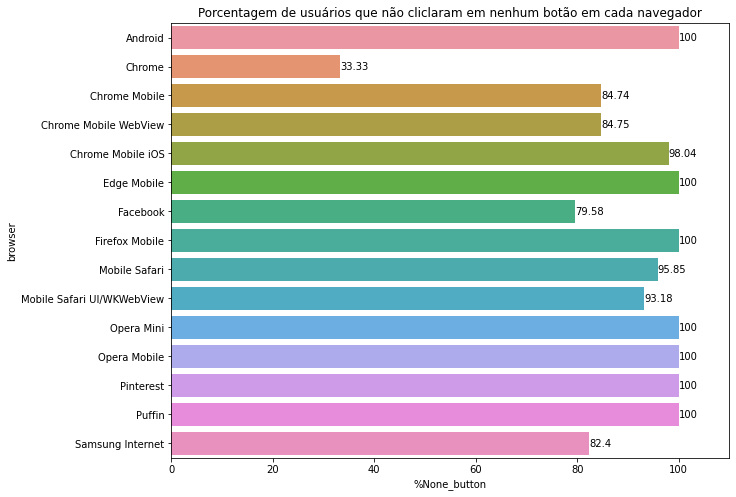

In [295]:
plt.figure(figsize = (10,8))
ax = sns.barplot(data = browser_button, y = 'browser', x = '%None_button')
ax.set_title('Porcentagem de usuários que não cliclaram em nenhum botão em cada navegador')
    
ax.bar_label(ax.containers[0])
ax.set_xlim((0, 110))
plt.show()

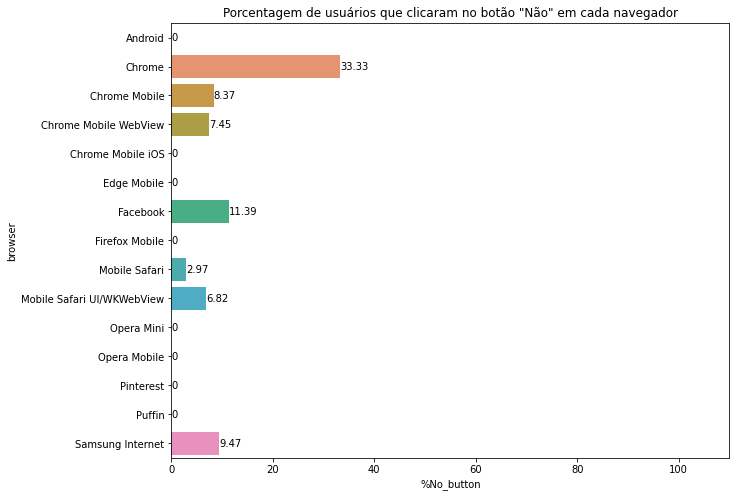

In [300]:
plt.figure(figsize = (10,8))
ax = sns.barplot(data = browser_button, y = 'browser', x = '%No_button')
ax.set_title('Porcentagem de usuários que clicaram no botão "Não" em cada navegador')
    
ax.bar_label(ax.containers[0])
ax.set_xlim((0, 110))
plt.show()

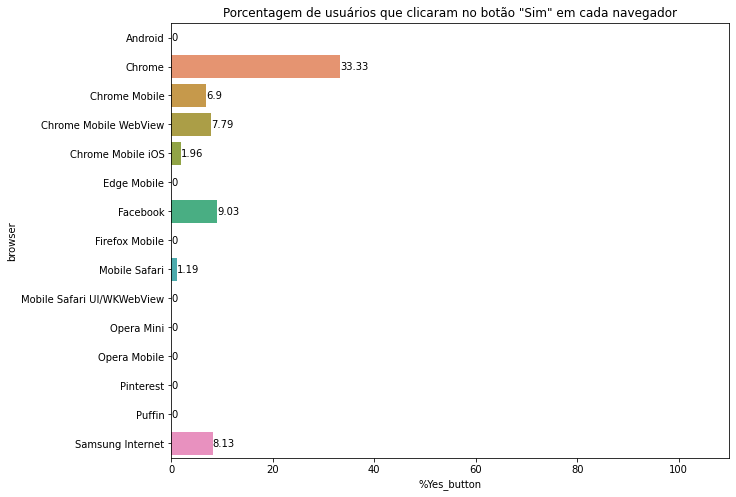

In [299]:
plt.figure(figsize = (10,8))
ax = sns.barplot(data = browser_button, y = 'browser', x = '%Yes_button')
ax.set_title('Porcentagem de usuários que clicaram no botão "Sim" em cada navegador')
    
ax.bar_label(ax.containers[0])
ax.set_xlim((0, 110))
plt.show()

* Os navegadores Chrome, Edge Mobile, Firefox Mobile, Opera Mobile e Pinteres tiveram menos que cinco visualizações da propaganda. Estes serão removidos.